# TSF task2
linear regression

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0, 0.5, 'score')

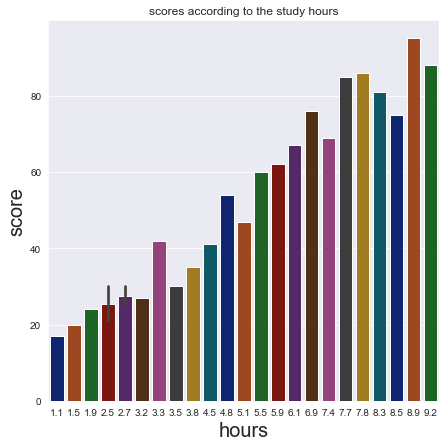

In [4]:
plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
sns.barplot(y=data['Scores'],x=data['Hours'],palette='dark')
plt.title("scores according to the study hours")
plt.xlabel("hours",fontsize=20)
plt.ylabel("score",fontsize=20)


Text(0, 0.5, 'score')

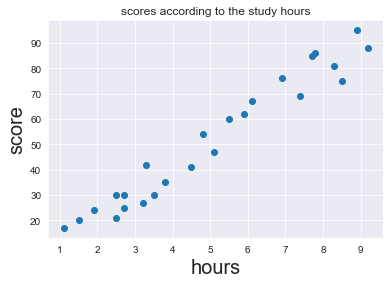

In [5]:
plt.plot(data['Hours'],data['Scores'],'o')
plt.title("scores according to the study hours")
plt.xlabel("hours",fontsize=20)
plt.ylabel("score",fontsize=20)

# model training

In [6]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [9]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[9.91065648]
2.018160041434683


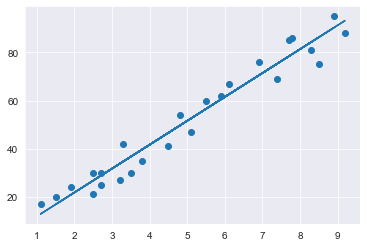

In [10]:
line = lin_reg.coef_*X+lin_reg.intercept_
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

In [11]:
ypred=lin_reg.predict(X_test)

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


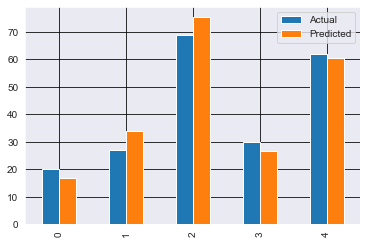

In [16]:
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',color='black')
plt.grid(which='minor',linestyle=':',color='black')

In [14]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score=r2_score(ypred,y_test)
mse=mean_squared_error(ypred,y_test)
msa=mean_absolute_error(ypred,y_test)
print("r2_score : ",score)
print("mean_squared_error : ",mse)
print("mean_absolute_error : ",msa)

r2_score :  0.9546785947197246
mean_squared_error :  21.5987693072174
mean_absolute_error :  4.183859899002975


# prediction


In [15]:
hours = 9.25
pred = lin_reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
